<h1 align="center"> Digital Image Processing </h1>
<h3 align="center"> Homework 2 </h3>
<h3 align="center"> Amirmehdi Jafari Fesharaki </h3>
<h3 align="center"> 98109645 </h3>

<hr style="height:3px">

## Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
import cv2
%matplotlib inline

### 1. First Method

In [2]:
def fft(im):
    return np.fft.fftshift(np.fft.fft2(im))
def ifft(im):
    return np.fft.ifft2(np.fft.ifftshift(im))
im = Image.open("q1.jpg")
im_np = np.array(im)
im_np_r = im_np[:,:,0]
im_np_g = im_np[:,:,1]
im_np_b = im_np[:,:,2]
im_fft_r = np.abs(fft(im_np_r))
im_fft_g = np.abs(fft(im_np_g))
im_fft_b = np.abs(fft(im_np_b))

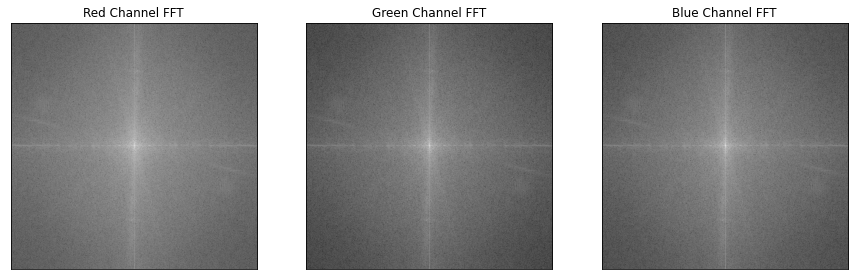

In [3]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(np.log(im_fft_r), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Red Channel FFT")

plt.subplot(1,3,2)
plt.imshow(np.log(im_fft_g), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Green Channel FFT")

plt.subplot(1,3,3)
plt.imshow(np.log(im_fft_b), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Blue Channel FFT")

plt.savefig("./results/q1_res01.jpg", dpi=300)
plt.show()

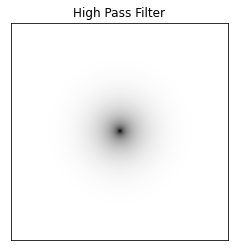

In [4]:
n_x, n_y = im_fft_r.shape
HP_filter = np.zeros((n_x,n_y))
x0 = np.floor(n_x/2)
y0 = np.floor(n_y/2)
for i in range(0, n_x):
    for j in range(0, n_y):
        HP_filter[i,j] = 255 - 254.9*np.exp(-((i-x0)**2 + (j-y0)**2)/100**2)
HP_filter = HP_filter / HP_filter.max()
plt.imshow(np.log(HP_filter), cmap="gray")
plt.xticks([]); plt.yticks([])
plt.title("High Pass Filter")
plt.savefig("./results/q1_res02.jpg", dpi=300)

In [5]:
HP_filter.max()

1.0

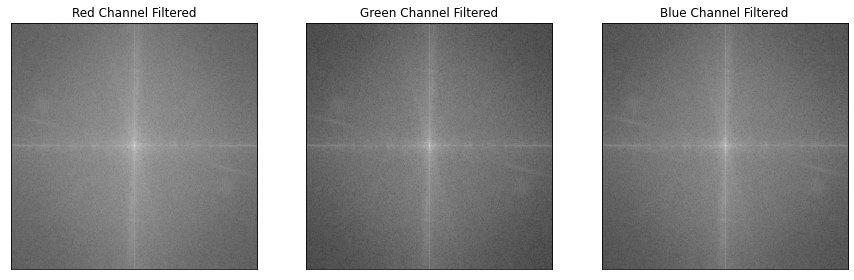

In [6]:
k = 1
r_filtered = fft(im_np_r) * (1 + k * HP_filter)
g_filtered = fft(im_np_g) * (1 + k * HP_filter)
b_filtered = fft(im_np_b) * (1 + k * HP_filter)

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(r_filtered)), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Red Channel Filtered")

plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(g_filtered)), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Green Channel Filtered")

plt.subplot(1,3,3)
plt.imshow(np.log(np.abs(b_filtered)), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Blue Channel Filtered")

plt.savefig("./results/q1_res03.jpg", dpi=300)

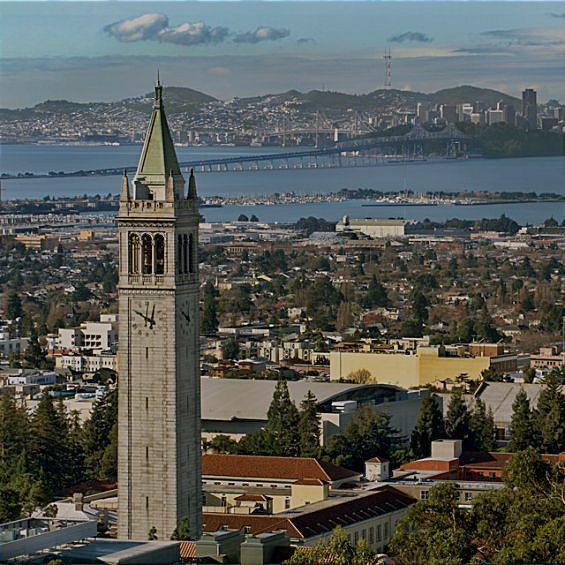

In [7]:
r_filtered_np = ifft(r_filtered)
g_filtered_np = ifft(g_filtered)
b_filtered_np = ifft(b_filtered)
im_filtered_np = np.zeros((n_x, n_y, 3), dtype = 'complex128')
im_filtered_np[:,:,0] = r_filtered_np
im_filtered_np[:,:,1] = g_filtered_np
im_filtered_np[:,:,2] = b_filtered_np
im_filtered_np = np.abs(im_filtered_np)
im_filtered = np.round_(im_filtered_np * 255 / im_filtered_np.max()).astype("uint8")
im_final = Image.fromarray(im_filtered)
im_final.save("./results/q1_res04.jpg")
im_final

### 2. Second Method

In [8]:
im_fft_r = fft(im_np_r)
im_fft_g = fft(im_np_g)
im_fft_b = fft(im_np_b)
n_x, n_y = im_fft_r.shape
mask = np.zeros((n_x,n_y))
x0 = np.floor(n_x/2)
y0 = np.floor(n_y/2)
for i in range(0, n_x):
    for j in range(0, n_y):
        mask[i,j] = 4 * np.pi**2 * (((i - x0)/n_x)**2 + ((j - y0)/n_y)**2)
im_fft_r_masked = im_fft_r * mask
im_fft_g_masked = im_fft_g * mask
im_fft_b_masked = im_fft_b * mask

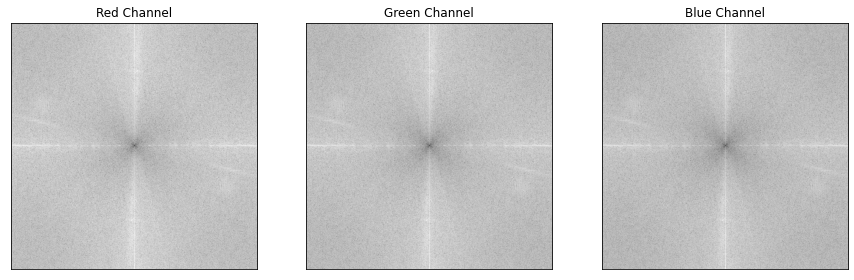

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(np.log(np.abs(im_fft_r_masked) + 1), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Red Channel")

plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(im_fft_g_masked) + 1), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(np.log(np.abs(im_fft_b_masked) + 1), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Blue Channel")

plt.savefig("./results/q1_res05.jpg", dpi=300)

In [10]:
im_masked = np.zeros((n_x, n_y, 3), dtype="complex128")
im_masked[:,:,0] = ifft(im_fft_r_masked)
im_masked[:,:,1] = ifft(im_fft_g_masked)
im_masked[:,:,2] = ifft(im_fft_b_masked)
im_masked_show = np.round_(np.abs(im_masked / im_masked.max() * 255)).astype("uint8")
im_unsharp_mask = Image.fromarray(im_masked_show)
im_unsharp_mask.save("./results/q1_res06.jpg")

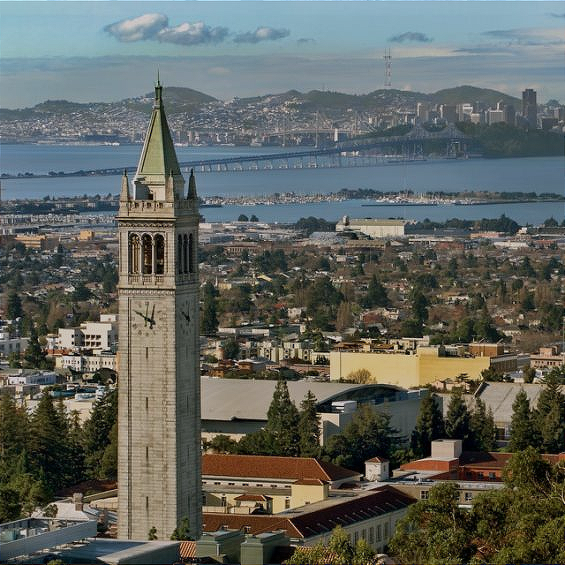

In [11]:
k = 0.15
im_final2_arr = im_np + k * im_masked
im_final2_arr = np.round_(np.abs(im_final2_arr) / np.abs(im_final2_arr).max() * 255).astype("uint8")
im_final2 = Image.fromarray(im_final2_arr)
im_final2.save("./results/q1_res07.jpg")
im_final2

<hr style="height:1.5px">

## Question 2

In [69]:
im1 = Image.open("q2-michael.jpeg")
im2 = Image.open("q2-dwight.jpeg")
mask = Image.open("q2-mask.png")

In [13]:
sigma_list = (256,128,64,32,16,8)
def gaussian_stack(im, i):
    if(i == 0):
        return im
    sigma = sigma_list[i-1]
    n1,n2,_ = im.shape
    im_fft_r = np.fft.fftshift(np.fft.fft2(im[:,:,0]))
    im_fft_g = np.fft.fftshift(np.fft.fft2(im[:,:,1]))
    im_fft_b = np.fft.fftshift(np.fft.fft2(im[:,:,2]))
    filter_fft = np.zeros((n1,n2))
    u0 = n1//2
    v0 = n2//2
    for u in range(n1):
        for v in range(n2):
            filter_fft[u, v] = np.exp(-((u-u0)**2 + (v-v0)**2) / sigma**2)
    im_fft_r_filtered = im_fft_r * filter_fft
    im_fft_g_filtered = im_fft_g * filter_fft
    im_fft_b_filtered = im_fft_b * filter_fft
    im_r_filtered = np.fft.ifft2(np.fft.ifftshift(im_fft_r_filtered))
    im_g_filtered = np.fft.ifft2(np.fft.ifftshift(im_fft_g_filtered))
    im_b_filtered = np.fft.ifft2(np.fft.ifftshift(im_fft_b_filtered))
    im_filtered = np.abs(np.dstack((im_r_filtered, im_g_filtered, im_b_filtered)))
    im_filtered = np.round_(im_filtered / im_filtered.max() * 255).astype("int16")
    return im_filtered

def laplacian_stack(im, i):
    if(i == len(sigma_list)):
        return gaussian_stack(im,i)
    else:
        return gaussian_stack(im,i) - gaussian_stack(im, i+1)
def blended_stack(im1, im2, mask, i):
    im1_laplacian = laplacian_stack(im1, i)
    im2_laplacian = laplacian_stack(im2, i)
    mask_gaussian = gaussian_stack(mask, i).astype("float")
    mask_gaussian = mask_gaussian / np.abs(mask_gaussian).max()
    blend_laplacian = im1_laplacian * mask_gaussian + im2_laplacian * (1 - mask_gaussian)
    return blend_laplacian
def blend_image(im1, im2, mask):
    im_blend = blended_stack(im1, im2, mask, 0)
    for i in range(1, len(sigma_list) + 1):
        im_blend = im_blend + blended_stack(im1, im2, mask, i)
    return im_blend

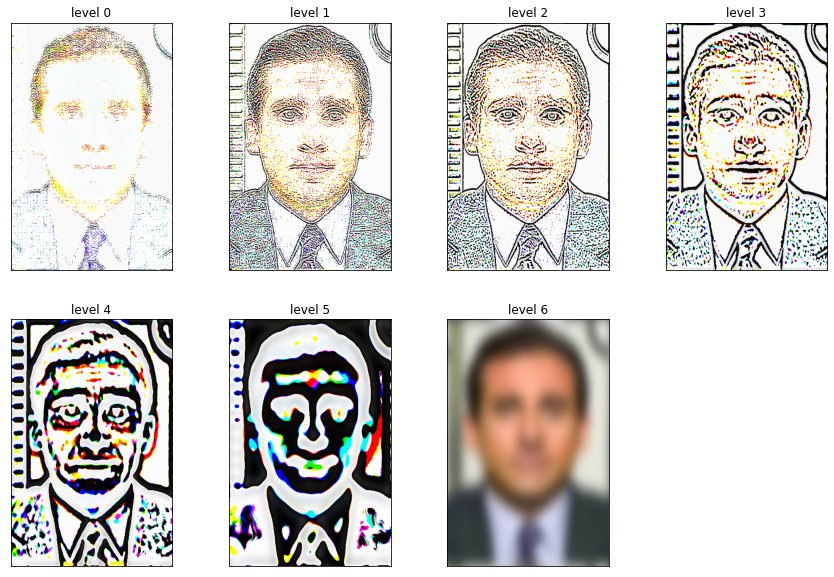

In [14]:
# laplacian stack
plt.figure(figsize=(15,10))
for i in range(0,len(sigma_list) + 1):
    lap = laplacian_stack(np.array(im1), i)
    plt.subplot(2,4,i+1)
    plt.imshow(lap.astype("uint8"))
    plt.title("level " + str(i))
    plt.xticks([]); plt.yticks([])

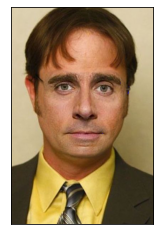

In [15]:
im_blend = np.round_(blend_image((np.array(im1))[:,:,0:3]
                                 , (np.array(im2))[:,:,0:3], (np.array(mask))[:,:,0:3]).astype("uint8"))
Image.fromarray(im_blend).save("./results/q2_blended.jpg")
plt.imshow(im_blend)
plt.xticks([]); plt.yticks([]);
plt.show();

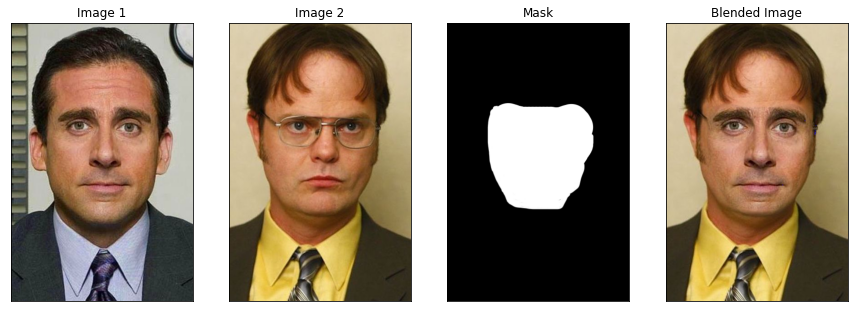

In [72]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(np.array(im1))
plt.xticks([]);plt.yticks([])
plt.title("Image 1")

plt.subplot(1,4,2)
plt.imshow(np.array(im2))
plt.xticks([]);plt.yticks([])
plt.title("Image 2")

plt.subplot(1,4,3)
plt.imshow(np.array(mask))
plt.xticks([]);plt.yticks([])
plt.title("Mask")

plt.subplot(1,4,4)
plt.imshow(im_blend)
plt.xticks([]);plt.yticks([])
plt.title("Blended Image")

plt.savefig("./results/q2_comparison.png", dpi=300)
plt.show()

<hr style="height:1.5px">

## Question 3

### Loading Image

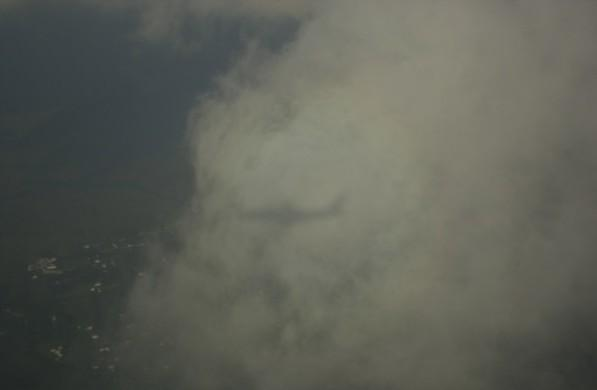

In [17]:
im = np.array(Image.open("q3.jpeg"))
Image.fromarray(im)

### SSR Algorithm

In [18]:
def gaussian_filter(n, m, sigma):
    x0 = n//2
    y0 = m//2
    filt = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            filt[i,j] = np.exp(-((i-x0)**2 + (j-y0)**2)/(2 * sigma**2))
    filt = filt / np.sum(filt)
    return filt
def scaler(im):
    return np.round_((im - im.min())/(im.max() - im.min()) * 255).astype("uint8")
def SSR(im, sigma = 80, scale = True):
    # for gaussian kernel, "n" = smallest odd number greater than ceil(6sigma) 
    gaussian_filt = gaussian_filter(im.shape[0], im.shape[1], sigma)
    gaussian_fft = fft(gaussian_filt)
    im_filtered = np.abs(ifft(fft(im) * gaussian_fft))
    retinex = np.log(im) - np.log(im_filtered)
    if (scale):
        retinex = np.round_((retinex - retinex.min())/(retinex.max() - retinex.min()) * 255).astype("uint8")
    return retinex

In [19]:
im_r = im[:,:,0]
im_g = im[:,:,1]
im_b = im[:,:,2]

ssr_r = SSR(im_r)
ssr_g = SSR(im_g)
ssr_b = SSR(im_b)

ssr = np.dstack((ssr_r, ssr_g, ssr_b))

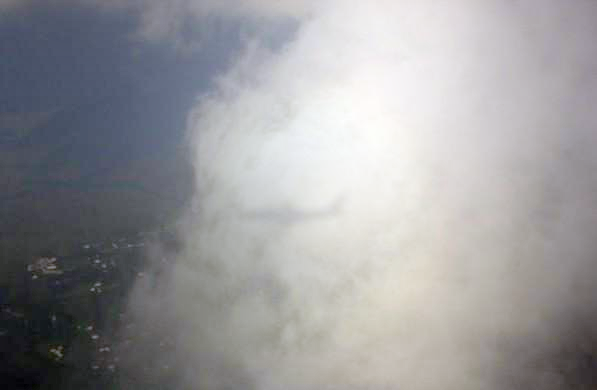

In [20]:
im_ssr = Image.fromarray(ssr)
im_ssr.save("./results/q3_SSR.png")
im_ssr

### MSR Algorithm

In [21]:
def MSR(im, scale=True):
    ssr_1 = SSR(im, 15, False)
    ssr_2 = SSR(im, 80, False)
    ssr_3 = SSR(im, 250, False)
    msr = (ssr_1 + ssr_2 + ssr_3)/3
    if (scale):
        msr = np.round_((msr - msr.min())/(msr.max() - msr.min()) * 255).astype("uint8")
    return msr

In [22]:
im_r = im[:,:,0]
im_g = im[:,:,1]
im_b = im[:,:,2]

msr_r = MSR(im_r)
msr_g = MSR(im_g)
msr_b = MSR(im_b)

msr = np.dstack((msr_r, msr_g, msr_b))

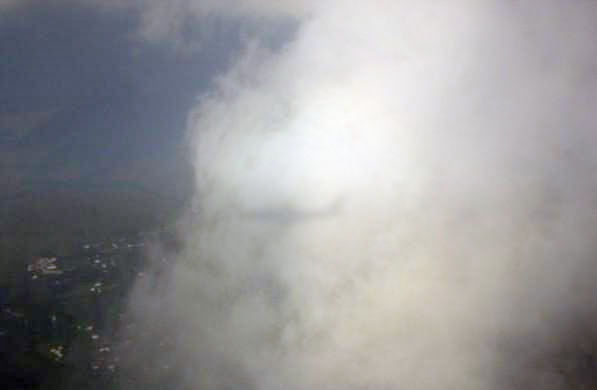

In [23]:
im_msr = Image.fromarray(msr)
im_msr.save("./results/q3_MSR.png")
im_msr

### MSRCR Algorithm

In [24]:
def MSRCR(im, alpha=125, beta=46):
    '''The input is a RGB image and the output is the MSRCR of this image'''
    im_r = im[:,:,0].astype("int16")
    im_g = im[:,:,1].astype("int16")
    im_b = im[:,:,2].astype("int16")
    im_total = im_r + im_g + im_b
    
    msrcr_r = MSR(im_r, False) * (np.log(125 * im_r) - np.log(im_total))
    msrcr_g = MSR(im_g, False) * (np.log(125 * im_g) - np.log(im_total))
    msrcr_b = MSR(im_b, False) * (np.log(125 * im_b) - np.log(im_total))
    
    msrcr = np.dstack((msrcr_r, msrcr_g, msrcr_b))
    msrcr = np.round_((msrcr - msrcr.min())/(msrcr.max() - msrcr.min()) * 255).astype("uint8")
    return msrcr

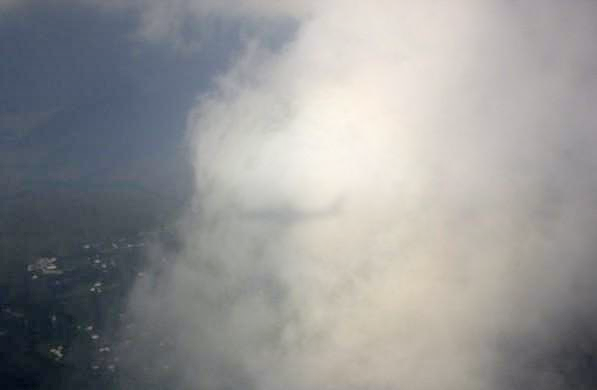

In [25]:
msrcr = MSRCR(im)
im_msrcr = Image.fromarray(msrcr)
im_msrcr.save("./results/q3_MSRCR.png")
im_msrcr

### MSRCP Algorithm

In [26]:
def MSRCP(im):
    im = im.astype("float")
    
    I_r = im[:,:,0]
    I_g = im[:,:,1]
    I_b = im[:,:,2]
    
    msrcp_r = np.zeros(I_r.shape)
    msrcp_g = np.zeros(I_g.shape)
    msrcp_b = np.zeros(I_b.shape)
    
    Int = (I_r + I_g + I_b)/3
    msr = MSR(Int, False)
    Int1 = np.round_((msr - msr.min())/(msr.max() - msr.min()) * 255)
    for i in range(Int1.shape[0]):
        for j in range(Int.shape[1]):
            B = max(I_r[i,j], I_g[i,j], I_b[i,j])
            A = min(255/B, Int1[i,j]/Int[i,j])
            msrcp_r[i,j] = A * I_r[i,j]
            msrcp_g[i,j] = A * I_g[i,j]
            msrcp_b[i,j] = A * I_b[i,j]
    return np.dstack((msrcp_r, msrcp_g, msrcp_b)).astype("uint8")

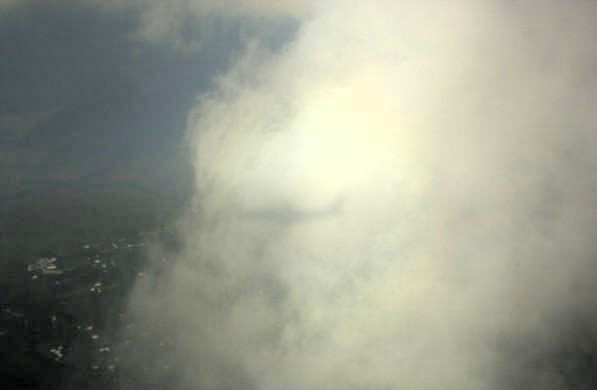

In [27]:
msrcp = MSRCP(im)
im_msrcp = Image.fromarray(msrcp)
im_msrcp.save("./results/q3_MSRCP.png")
im_msrcp

<hr style="height:1.5px">

## Question 4

In [28]:
im = cv2.imread("q4.png")
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

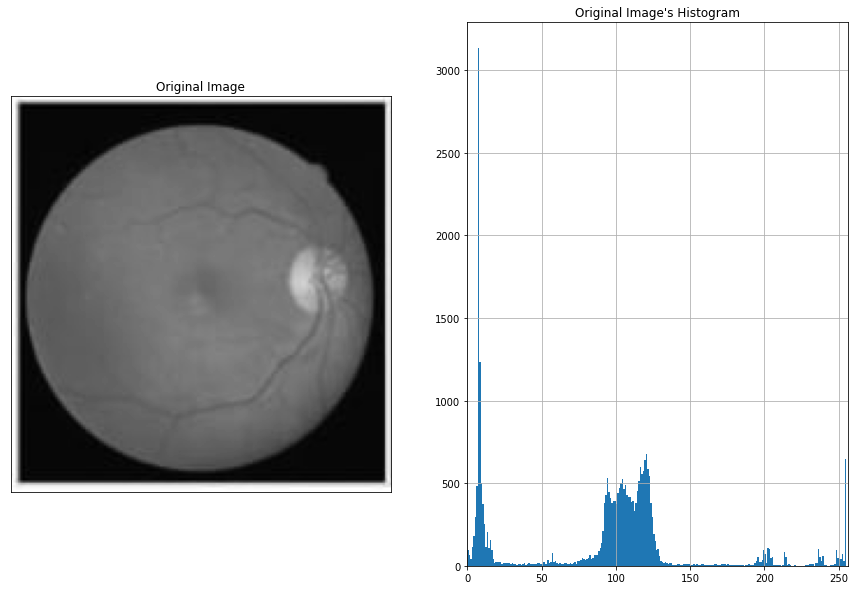

In [29]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(im_gray, cmap="gray")
plt.xticks([]); plt.yticks([])
plt.title("Original Image")

plt.subplot(1,2,2)
plt.hist(im_gray.reshape(im_gray.shape[0] * im_gray.shape[1]), bins=np.arange(0,256))
plt.grid()
plt.xlim([0,256])
plt.title("Original Image's Histogram")
plt.show()

### HE

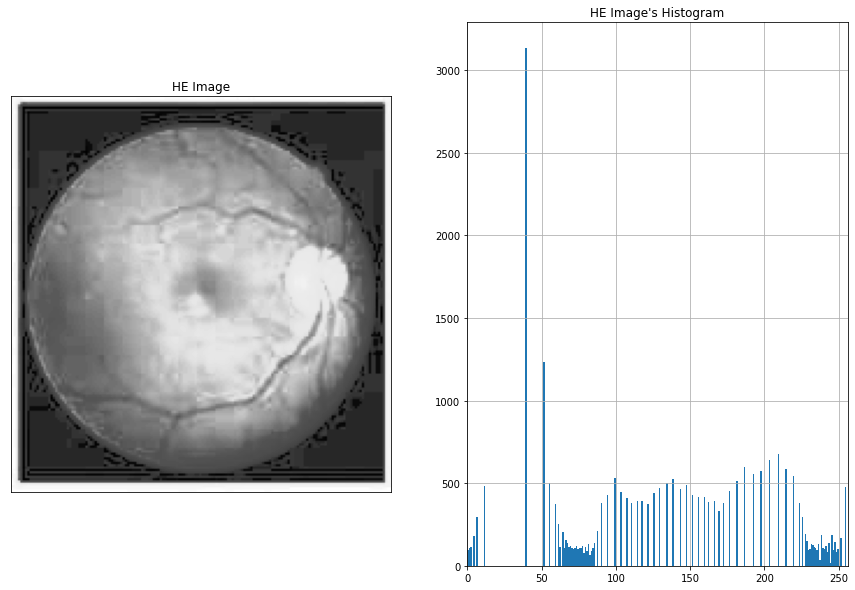

In [30]:
im_HE = cv2.equalizeHist(im_gray)
(Image.fromarray(im_HE)).save("./results/q4_1.png")

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(im_HE, cmap="gray")
plt.xticks([]); plt.yticks([])
plt.title("HE Image")

plt.subplot(1,2,2)
plt.hist(im_HE.reshape(im_HE.shape[0] * im_HE.shape[1]), bins=np.arange(0,256))
plt.grid()
plt.xlim([0,256])
plt.title("HE Image's Histogram")
plt.show()

### AHE

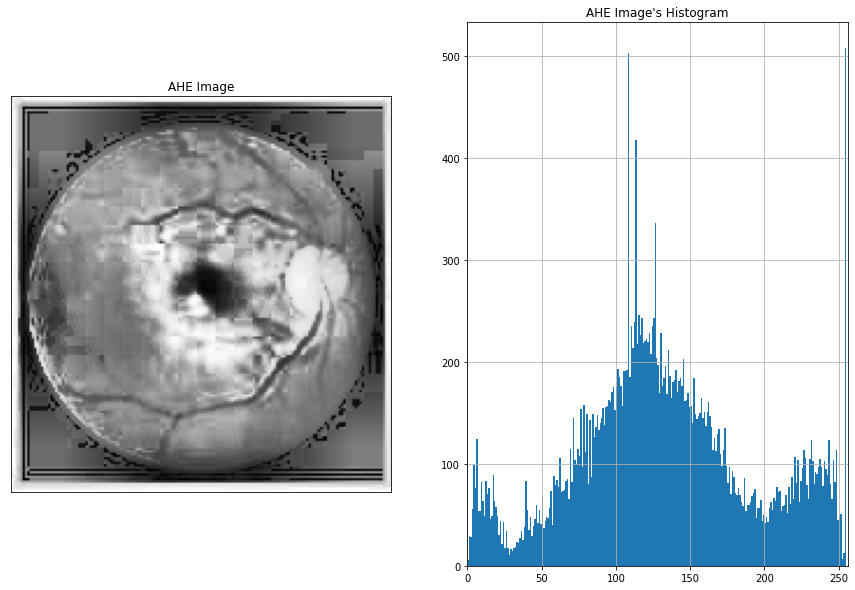

In [31]:
# we set clipLimit a large number and due to this, the CLAHE would become ALE because none of the parts of the 
# histogram would be limited if we set clipLimit limit equal to a large number
ahe = cv2.createCLAHE(clipLimit = 3500, tileGridSize=(4,4)) 
im_AHE = ahe.apply(im_gray)
(Image.fromarray(im_AHE)).save("./results/q4_2.png")

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(im_AHE, cmap="gray")
plt.xticks([]); plt.yticks([])
plt.title("AHE Image")

plt.subplot(1,2,2)
plt.hist(im_AHE.reshape(im_AHE.shape[0] * im_AHE.shape[1]), bins=np.arange(0,256))
plt.grid()
plt.xlim([0,256])
plt.title("AHE Image's Histogram")
plt.show()

### CLAHE

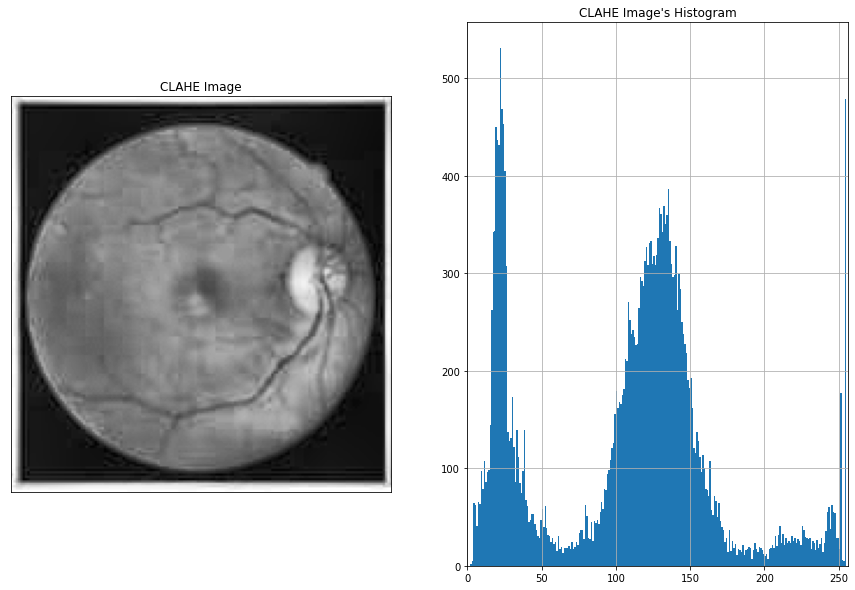

In [32]:
clahe = cv2.createCLAHE(clipLimit = 4, tileGridSize=(8,8)) 
im_CLAHE = clahe.apply(im_gray)
(Image.fromarray(im_CLAHE)).save("./results/q4_3.png")

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(im_CLAHE, cmap="gray")
plt.xticks([]); plt.yticks([])
plt.title("CLAHE Image")

plt.subplot(1,2,2)
plt.hist(im_CLAHE.reshape(im_CLAHE.shape[0] * im_CLAHE.shape[1]), bins=np.arange(0,256))
plt.grid()
plt.xlim([0,256])
plt.title("CLAHE Image's Histogram")
plt.show()

### Comparison

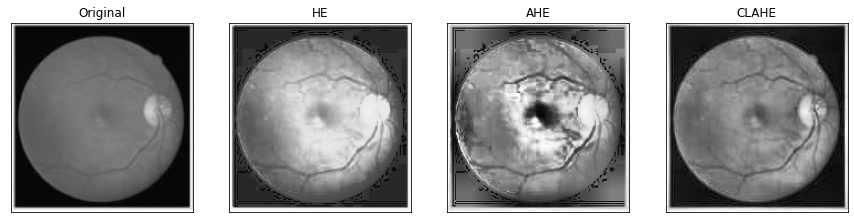

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(im_gray, cmap="gray")
plt.xticks([]);plt.yticks([])
plt.title("Original")

plt.subplot(1,4,2)
plt.imshow(im_HE, cmap="gray")
plt.xticks([]);plt.yticks([])
plt.title("HE")

plt.subplot(1,4,3)
plt.imshow(im_AHE, cmap="gray")
plt.xticks([]);plt.yticks([])
plt.title("AHE")

plt.subplot(1,4,4)
plt.imshow(im_CLAHE, cmap="gray")
plt.xticks([]);plt.yticks([])
plt.title("CLAHE")

plt.savefig("./results/q4_comparison.png")
plt.show()

<hr style="height:1.5px">

## Question 5

In [34]:
def save_im(im, file_name):
    (Image.fromarray(im)).save(file_name)
def gaussian_filter_creator(n, sigma):
    x0 = n//2
    y0 = n//2
    filt = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            filt[i,j] = np.exp(-((i-x0)**2 + (j-y0)**2)/(2 * sigma**2))
    filt = filt / (2 * np.pi * sigma**2)
    return filt
def rescale(im):
    return np.round_(im / im.max() * 255).astype("uint8")
def square_filter_creator(n, m):
    x0 = n//2
    y0 = n//2
    filt = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if (abs((i-x0)) <= m//2) and (abs((j-y0)) <= m//2):
                filt[i,j] = 1;
    return filt

### Part 1

In [35]:
im = Image.open("q5.png")
im_np = np.array(im)

# filters
sobel_x_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_filter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

gaussian_filter = gaussian_filter_creator(43, 7)

laplacian_filter = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

In [36]:
sobel_x_filtered = ndimage.convolve(im_np, sobel_x_filter)
sobel_y_filtered = ndimage.convolve(im_np, sobel_y_filter)
sobel_filtered = np.sqrt(sobel_x_filtered**2 + sobel_y_filtered**2)
sobel_filtered = np.round_(sobel_filtered / sobel_filtered.max() * 255).astype("uint8")
save_im(sobel_filtered, "./results/q5_res01.png")

gaussian_filtered = ndimage.convolve(im_np, gaussian_filter)
save_im(gaussian_filtered, "./results/q5_res02.png")

laplacian_filtered = ndimage.convolve(im_np, laplacian_filter)
save_im(laplacian_filtered, "./results/q5_res03.png")

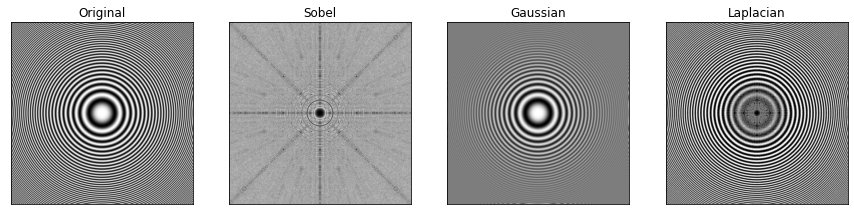

In [37]:
def imshow(im):
    plt.imshow(im, cmap="gray")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
imshow(im_np)
plt.title("Original")

plt.subplot(1,4,2)
imshow(sobel_filtered)
plt.title("Sobel")

plt.subplot(1,4,3)
imshow(gaussian_filtered)
plt.title("Gaussian")

plt.subplot(1,4,4)
imshow(laplacian_filtered)
plt.title("Laplacian")
plt.savefig("./results/q5_compared1.png", dpi=300)
plt.show()

### Part 2

In [38]:
im_fft = fft(im_np)
im_fft_saved = rescale(np.log(np.abs(im_fft) + 1))
save_im(im_fft_saved, "./results/q5_res04.png")

In [39]:
## Gaussian Filter
n = im_np.shape[0]
gaussian_fft = fft(gaussian_filter_creator(n, 7))
gaussian_fft = np.abs(gaussian_fft)

In [40]:
im_gaussian_filtered_fft = gaussian_fft * im_fft
im_gaussian_filtered_fft_saved = rescale(np.log(np.abs(im_gaussian_filtered_fft) + 1))
save_im(im_gaussian_filtered_fft_saved, "./results/q5_res05.png")

In [41]:
gaussian_neg_fft = 1 - gaussian_fft

im_gaussian_neg_filtered_fft = gaussian_neg_fft * im_fft
im_gaussian_neg_filtered_fft_saved = rescale(np.log(np.abs(im_gaussian_neg_filtered_fft) + 1))
save_im(im_gaussian_neg_filtered_fft_saved, "./results/q5_res06.png")

In [42]:
im_gaussian = rescale(np.abs(ifft(im_gaussian_filtered_fft)))
im_gaussian_neg = rescale(np.abs(ifft(im_gaussian_neg_filtered_fft)))
save_im(im_gaussian, "./results/q5_res07.png")
save_im(im_gaussian_neg, "./results/q5_res08.png")

In [43]:
## Square Filter
square_fft = square_filter_creator(n, n//15)
square_neg_fft = 1 - square_fft

im_square_filtered_fft = im_fft * square_fft
im_square_filtered_fft_saved = rescale(np.log(np.abs(im_square_filtered_fft) + 1))
save_im(im_square_filtered_fft_saved, "./results/q5_res09.png")

im_square_neg_filtered_fft = im_fft * square_neg_fft
save_im(rescale(np.log(np.abs(im_square_neg_filtered_fft) + 1)), "./results/q5_res10.png")

In [44]:
im_square_filtered = rescale(np.abs(ifft(im_square_filtered_fft)))
im_square_neg_filtered = rescale(np.abs(ifft(im_square_neg_filtered_fft)))
save_im(im_square_filtered, "./results/q5_res11.png")
save_im(im_square_neg_filtered, "./results/q5_res12.png")

### Part 3

In [45]:
image_upsampled = im.resize((4 * n, 4 * n))
image_downsampled = im.resize((n//10, n//10))

In [46]:
image_upsampled.save("./results/q5_res13.png")
image_downsampled.save("./results/q5_res14.png")

<hr style="height:1.5px">

## Question 6

In [47]:
import timeit

im1 = cv2.cvtColor(cv2.imread("q7_1.png"), cv2.COLOR_BGR2GRAY)
im2 = cv2.cvtColor(cv2.imread("q7_2.png"), cv2.COLOR_BGR2GRAY)

### Template Correlation Method (Using Normalized Cross-Correlation)

In [48]:
def corr_coef_calc(im1, im2):
    prod = np.mean((im1 - np.mean(im1)) * (im2 - np.mean(im2)))
    std = im1.std() * im2.std()
    if std == 0:
        return 0
    else:
        return prod/std
def corr_array_calc(im1, im2):
    '''Calculates the normalized cross-correlation array of two input array. The second input "im2" should be the
    one with a smaller size.'''
    window_x = im2.shape[0]
    window_y = im2.shape[1]
    corr_arr = np.zeros(im1.shape)
    im1_pad = np.pad(im1, ((- ((-window_x)//2), window_x//2),(- ((-window_y)//2), window_y//2)))
    counter = 0
    for i in range(im1.shape[0]):
        #counter = counter + 1
        #print(counter)
        for j in range(im1.shape[1]):
            window = im1_pad[i:i + window_x, j:j + window_y].copy()
            corr_arr[i,j] = corr_coef_calc(window, im2)
    return corr_arr

def local_maxima_detector(arr, window_x, window_y):
    arr_pad = np.pad(arr, ((- ((-window_x)//2), window_x//2),(- ((-window_y)//2), window_y//2)))
    local_maxima = np.zeros(arr.shape)
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            window = arr_pad[i:i + window_x, j:j + window_y].copy()
            mid = window[-((-window_x)//2),-((-window_y)//2)].copy()
            if (mid == window.max()) and (mid != 0):
                local_maxima[i,j] = 1
    return local_maxima

In [49]:
start_time_1 = timeit.default_timer()
corr_arr = corr_array_calc(im1, im2)

In [50]:
corr_arr[corr_arr<0.95] = 0 
local_maxima = local_maxima_detector(corr_arr, im2.shape[0], im2.shape[1])

In [51]:
save_im(rescale(local_maxima),"./results/q6_mask1.png")

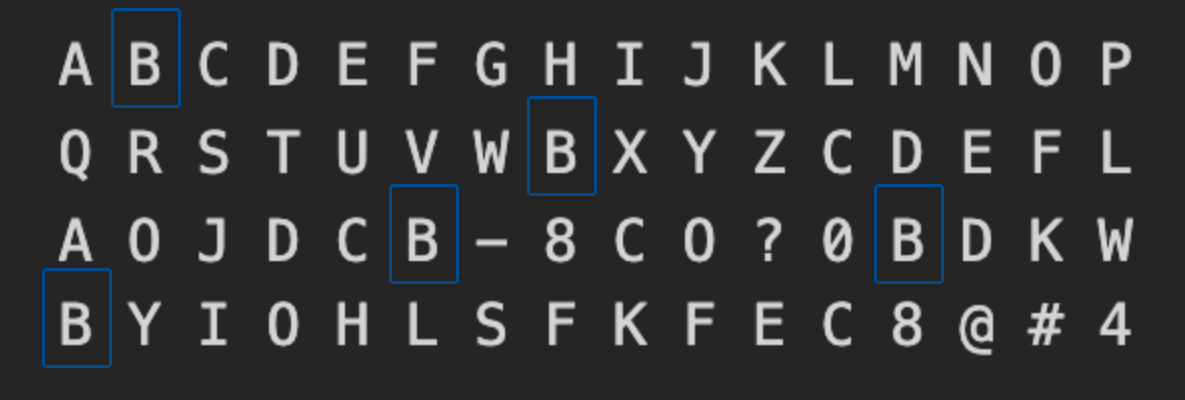

In [52]:
x, y = np.where(local_maxima == 1)

# Boundary Color RGBA = [0, 75, 141, 255]
im1_color = np.array(Image.open("q7_1.png"))
len_x = im2.shape[0]
len_y = im2.shape[1]
for k in range(len(x)):
    i = x[k]
    j = y[k]
    i_min = i + (-len_x)//2
    i_max = i + len_x//2
    j_min = j + (-len_y)//2
    j_max = j + len_y//2
    im1_color[i_min-1:i_max+1, j_min - 3:j_min, :] = [0, 75, 141, 255]
    im1_color[i_min-1:i_max+1, j_max:j_max + 3, :] = [0, 75, 141, 255]
    im1_color[i_min - 3:i_min, j_min-1:j_max+1, :] = [0, 75, 141, 255]
    im1_color[i_max:i_max + 3, j_min-1:j_max+1, :] = [0, 75, 141, 255]
im_detected1 = Image.fromarray(im1_color)
im_detected1.save("./results/q6_detected1.png")
elapsed_1 = timeit.default_timer() - start_time_1
im_detected1

In [53]:
print("Elapsed time for this method is: {:.2f}s".format(elapsed_1))

Elapsed time for this method is: 82.87s


### Pyramid Processing

In [54]:
def image_pyramid(im, n):
    '''Gets the input image (im) and the pyramid level (n) and returns an array containig the pyramids from level
    0 to n'''
    pyramid_arr = []
    for i in range(n+1):
        scale_factor = 2**(i)
        if i==0 :
            pyramid_arr.append(im)
        else:
            im_resized = im[0::scale_factor, 0::scale_factor].copy()
            pyramid_arr.append(im_resized)
    return pyramid_arr

In [55]:
def corr_array_selected(im1, im2, x, y):
    window_x = im2.shape[0]
    window_y = im2.shape[1]
    corr_arr = np.zeros(len(x))
    im1_pad = np.pad(im1, ((- ((-window_x)//2), window_x//2),(- ((-window_y)//2), window_y//2)))
    for k in range(len(x)):
        i = x[k]
        j = y[k]
        window = im1_pad[i:i + window_x, j:j + window_y].copy()
        corr_arr[k] = corr_coef_calc(window, im2)
    return corr_arr
def pyramid_processing(im1, im2, n):
    im1_pyramid = image_pyramid(im1, n)
    im2_pyramid = image_pyramid(im2, n)
    im1_selected = im1_pyramid[n]
    im2_selected = im2_pyramid[n]
    corr_arr = corr_array_calc(im1_selected, im2_selected)
    x, y = np.where(corr_arr > 0.80)
    x = np.array([x*2, x*2+1, x*2-1, x*2, x*2+1, x*2-1, x*2, x*2+1, x*2-1]).flatten()
    y = np.array([y*2, y*2, y*2, y*2+1, y*2+1, y*2+1, y*2-1, y*2-1, y*2-1]).flatten()
    for i in range(n-1, -1, -1):
        im1_selected = im1_pyramid[i]
        im2_selected = im2_pyramid[i]
        
        x = np.delete(x, np.logical_or(x >= im1_selected.shape[0], x < 0))
        y = np.delete(y, np.logical_or(y >= im1_selected.shape[1], y < 0))
        corr_arr = corr_array_selected(im1_selected, im2_selected, x, y)
        corr_arr[corr_arr < 0.80] = 0
        if i != 0:
            x, y = x[np.where(corr_arr != 0)], y[np.where(corr_arr != 0)]
            x = np.array([x*2, x*2+1, x*2-1, x*2, x*2+1, x*2-1, x*2, x*2+1, x*2-1]).flatten()
            y = np.array([y*2, y*2, y*2, y*2+1, y*2+1, y*2+1, y*2-1, y*2-1, y*2-1]).flatten()
            xy_unique = np.unique(np.vstack((x,y)), axis=1)
            x = xy_unique[0, :]
            y = xy_unique[1, :]
    corr_arr[corr_arr < 0.95] = 0
    x, y = x[np.where(corr_arr != 0)], y[np.where(corr_arr != 0)]
    corr_arr_final = corr_arr[np.where(corr_arr != 0)]
    return local_maximum_selected(x, y, corr_arr_final, im2.shape[0]//2, im2.shape[1]//2 )

def local_maximum_selected(x, y, weight, window_x, window_y):
    weight_mod = weight.copy()
    for (i,j,w) in zip(x,y,weight):
        mask = np.logical_and(np.logical_and(weight_mod < w, np.abs(x - i) < window_x), np.abs(y - j) < window_y)
        weight_mod[mask] = 0
    return (x[np.where(weight_mod != 0)], y[np.where(weight_mod != 0)], weight_mod[np.where(weight_mod != 0)])

In [56]:
start_time_2 = timeit.default_timer()
x_p, y_p, corr_p = pyramid_processing(im1, im2, 2)

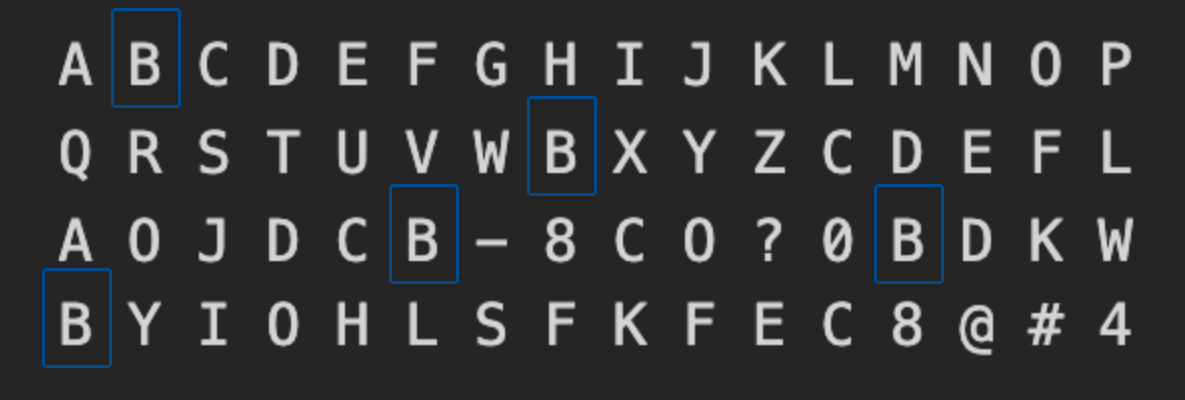

In [57]:
im1_color = np.array(Image.open("q7_1.png"))
len_x = im2.shape[0]
len_y = im2.shape[1]
for k in range(len(x_p)):
    i = x_p[k]
    j = y_p[k]
    i_min = i + (-len_x)//2
    i_max = i + len_x//2
    j_min = j + (-len_y)//2
    j_max = j + len_y//2
    im1_color[i_min-1:i_max+1, j_min - 3:j_min, :] = [0, 75, 141, 255]
    im1_color[i_min-1:i_max+1, j_max:j_max + 3, :] = [0, 75, 141, 255]
    im1_color[i_min - 3:i_min, j_min-1:j_max+1, :] = [0, 75, 141, 255]
    im1_color[i_max:i_max + 3, j_min-1:j_max+1, :] = [0, 75, 141, 255]
im_detected2 = Image.fromarray(im1_color)
im_detected2.save("./results/q6_detected2.png")
elapsed_2 = timeit.default_timer() - start_time_2
im_detected2

In [58]:
print("Elapsed time for this method is: {:.2f}s".format(elapsed_2))

Elapsed time for this method is: 3.00s


<b> As we can see, the second method (Pyramid Processing) takes a significantly lower time in comparison with the first method (Template Correlation). </b>

<hr style="height:1.5px">

## Question 7

We first read the images and save its 3D array as 3 2D arrays that contain R, G and B of each of the images

In [59]:
near = cv2.cvtColor(cv2.imread('./q2-michael.jpeg'), cv2.COLOR_BGR2GRAY)
far = cv2.cvtColor(cv2.imread('./q2-dwight.jpeg'), cv2.COLOR_BGR2GRAY)

In [60]:
near_f = np.fft.fft2(near)
near_fshift = np.fft.fftshift(near_f)
near_spectrum = 20 * np.log(np.abs(near_fshift) + 1)
cv2.imwrite('./results/q7_spectrum_near.jpg', near_spectrum)

far_f = np.fft.fft2(far)
far_fshift = np.fft.fftshift(far_f)
far_spectrum = 20 * np.log(np.abs(far_fshift) + 1)
cv2.imwrite('./results/q7_spectrum_far.jpg', far_spectrum)

True

### Spectrums

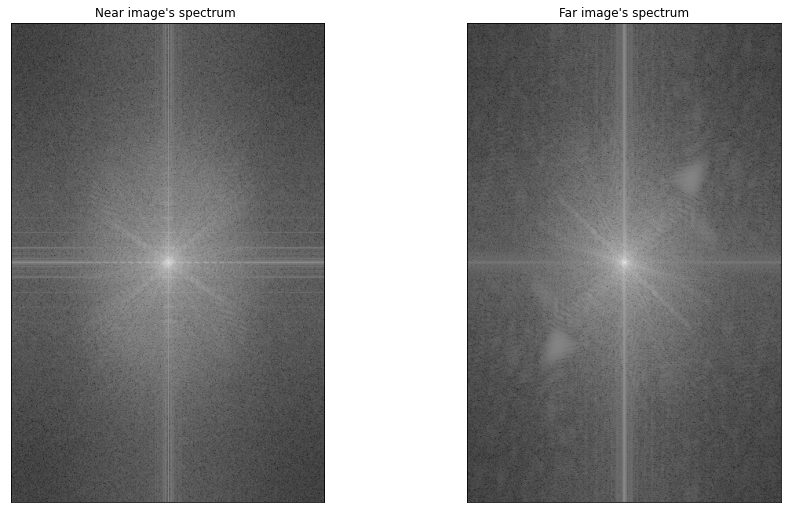

In [61]:
plt.figure(figsize = (15,30))
plt.subplot(321)
plt.imshow(near_spectrum, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title("Near image's spectrum ")
plt.subplot(322)
plt.imshow(far_spectrum, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title("Far image's spectrum")
plt.show()

### Defining Gaussian Filter

In [62]:
def gaussianFilter(row, column, sigma, HighPass = True):
    rowOrigin = int(row/2) + row%2
    columnOrigin = int(column/2) + column%2
    gaussian_filter = np.zeros((row, column))
    for y in range(column):
        for x in range(row):
            G = np.exp(-1.0 * ((x - rowOrigin)**2 + (y - columnOrigin)**2) / (2 * sigma**2))
            gaussian_filter[x][y] = (-1)**HighPass * G + 1 * HighPass
    return gaussian_filter

### Gaussian Filters

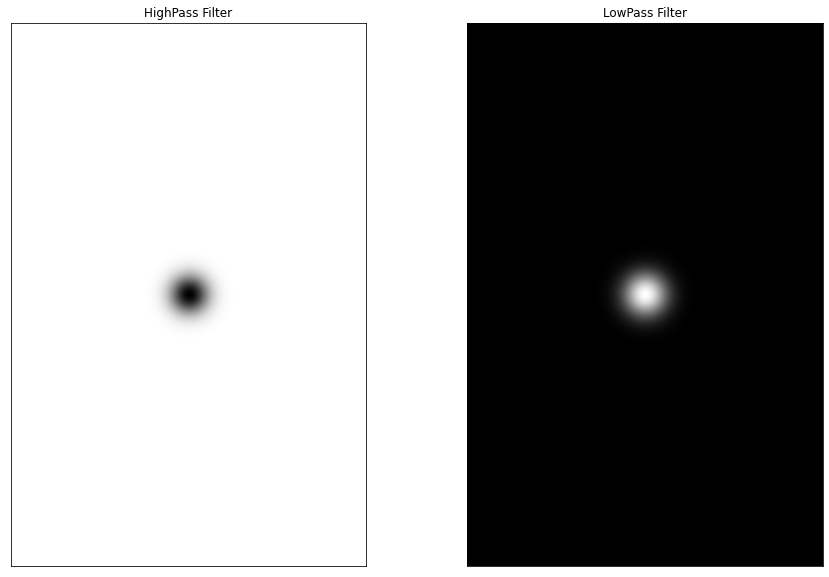

In [63]:
r = 15 #less
s = 17

near_row, near_column = near_fshift.shape
far_row, far_column = far_fshift.shape
highpass = gaussianFilter(near_row, near_column, r, True)
lowpass = gaussianFilter(far_row, far_column, s, False)
plt.figure(figsize = (15,10))
plt.subplot(121)
plt.imshow(highpass, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("HighPass Filter")
plt.subplot(122)
plt.imshow(lowpass, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("LowPass Filter")
plt.show()

### Defining Cutoff filter

In [64]:
def cutoffFilter(row, column, cutoff, HighPass = True):
    rowOrigin = int(row/2) + row%2
    columnOrigin = int(column/2) + column%2
    cutoff_filter = np.zeros((row, column))
    for y in range(column):
        for x in range(row):
            if ((x - rowOrigin)**2 + (y-columnOrigin)**2 > cutoff**2 ):
                cutoff_filter[x][y] = HighPass * 1
            else:
                cutoff_filter[x][y] = 1 - HighPass * 1
            
    return cutoff_filter

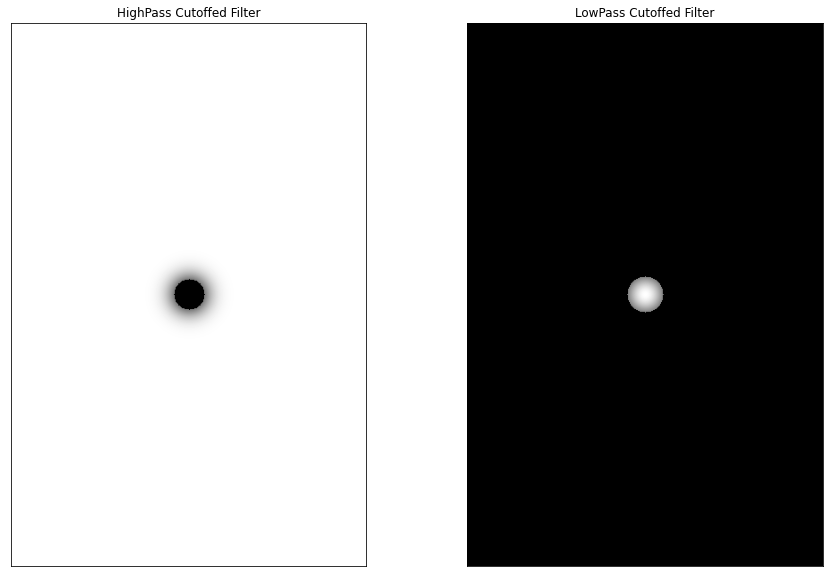

In [65]:
ratio = 1/2
highpass_cutoff = int(np.sqrt(np.log(1/ratio) * 2 * r**2))
lowpass_cutoff = int(np.sqrt(np.log(1/ratio) * 2 * s**2))
#highpass_cutoff = 16
#lowpass_cutoff = 24
highpass = highpass * cutoffFilter(near_row, near_column,highpass_cutoff, True)
lowpass = lowpass * cutoffFilter(far_row, far_column, lowpass_cutoff, False)
plt.figure(figsize = (15,10))
plt.subplot(121)
plt.imshow(highpass, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("HighPass Cutoffed Filter")
plt.subplot(122)
plt.imshow(lowpass, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.title("LowPass Cutoffed Filter")
plt.show()

### Applying Filters

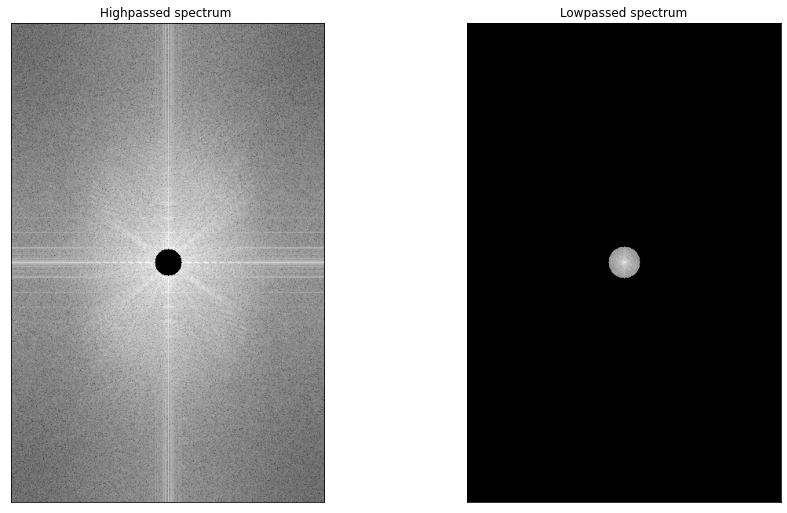

In [66]:
highpassed = near_fshift * highpass
lowpassed = far_fshift * lowpass

highpassed_spectrum = 20 * np.log(np.abs(highpassed) + 1)
lowpassed_spectrum = 20 * np.log(np.abs(lowpassed) + 1)
cv2.imwrite('./results/q7_filtered_near.jpg', highpassed_spectrum)
cv2.imwrite('./results/q7_filtered_far.jpg', lowpassed_spectrum)

plt.figure(figsize = (15,30))
plt.subplot(321)
plt.imshow(highpassed_spectrum, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title("Highpassed spectrum ")
plt.subplot(322)
plt.imshow(lowpassed_spectrum, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title("Lowpassed spectrum")
plt.show()

### Finding the Final Hybrid Image

In [67]:
hybrid = (highpassed * 0.5 + lowpassed) / (highpass * 0.5 + lowpass)
hybrid_ishift = np.fft.ifftshift(hybrid)
final_near = np.abs(np.fft.ifft2(hybrid_ishift))

width = int(final_near.shape[1] /5)
height = int(final_near.shape[0] /5)

final_far = cv2.resize(final_near, (width, height))

width = int(final_near.shape[1]*1.2)
height = int(final_near.shape[0]*1.2)

final_near = cv2.resize(final_near, (width, height))

cv2.imwrite('./results/q7_final.jpg', final_near)
cv2.imwrite('./results/q7_initial_near.jpg', near)
cv2.imwrite('./results/q7_initial_far.jpg', far)

True